In [1]:
#Import numpy for Matrix Calculations.
import numpy as np

#For Linear Algebra
from numpy import linalg as LA

#Import pyplot to generate 2-D plots.
from matplotlib import pyplot as plt

In [2]:
#loading the dataset
data = np.genfromtxt('dataset_1.csv', delimiter=',', skip_header = 1)

#Supress 
np.set_printoptions(suppress=True)

#Data Shape and size.
print("Size is " + str(data.size)) 
print("Shape is " + str(data.shape))

Size is 3000
Shape is (1000, 3)


In [3]:
#Data Mean
data_mean = np.mean(data, axis=0)
print("Mean is " + str(data_mean))

Mean is [ 0.503454  2.511309  0.509261]


In [4]:
#Standard deviation
data_std = np.std(data, axis =0)
print("Standard Deviation is " + str(data_std))

Standard Deviation is [ 0.28377686  1.44806857  0.28372866]


In [5]:
#Data Maximum
data_max = np.max(data, axis=0)
print("Data Maximum is " + str(data_max))

Data Maximum is [ 0.998  5.788  0.997]


In [6]:
#Data Minimum
data_min = np.min(data, axis=0)
print("Data Minimum is " + str(data_min))

Data Minimum is [ 0.    -0.453  0.   ]


In [7]:
# Calculating variance of every varaible
x = data[:,0]
y = data[:,1]
z = data[:,2]

print("Variance of x is: " + str(np.var(x)))
print("Variance of y is: " + str(np.var(y)))
print("Variance of z is: " + str(np.var(z)))

Variance of x is: 0.080529305884
Variance of y is: 2.09690259152
Variance of z is: 0.080501954879


In [8]:
# Covariances

X = np.vstack((x,y))
print("Covariance of x,y: ")
print(str(np.cov(X)))


Y = np.vstack((y,z))
print("Covariance of y,z: ")
print(str(np.cov(Y)))


Z = np.vstack((x,z))
print("Covariance of x,z: ")
print(str(np.cov(Z)))

Covariance of x,y: 
[[ 0.08060992  0.40242878]
 [ 0.40242878  2.09900159]]
Covariance of y,z: 
[[ 2.09900159 -0.01439466]
 [-0.01439466  0.08058254]]
Covariance of x,z: 
[[ 0.08060992 -0.0025104 ]
 [-0.0025104   0.08058254]]


In [9]:
# Calculating Data Array for PCA
data_PCA = (data - data_mean) / data_std
data_PCA

array([[-1.47811207, -1.17971554,  0.05194752],
       [-0.67818779, -0.59894194,  0.08014347],
       [ 0.16049934,  0.02879076, -1.57636875],
       ..., 
       [ 0.41774372,  0.23941615,  1.20798158],
       [-1.70364138, -1.95454073, -1.28736024],
       [ 0.9040413 ,  1.03633973, -0.55074097]])

In [10]:
#Getting transpose.
data_PCA_transpose = data_PCA.transpose()

#Getting size of transpose.
print("Data transpose Size: " + str(data_PCA_transpose.size) + ". Shape: " + str(data_PCA_transpose.shape))

Data transpose Size: 3000. Shape: (3, 1000)


### Principal Component Analysis

Calculating the covariance matrix. 

In [11]:
cov_mat = np.matmul(data_PCA_transpose, data_PCA) / (data_PCA.shape[0] - 1)
print("Covariance Matrix is: " + str(cov_mat))

Covariance Matrix is: [[ 1.001001    0.97931616 -0.03117904]
 [ 0.97931616  1.001001   -0.03503555]
 [-0.03117904 -0.03503555  1.001001  ]]


Diagonalising the covariance matrix (cov_mat) to obtain eigenvalues and corresponding eigen vectors.

In [12]:
lam, p = LA.eig(cov_mat)

#Print values.
print("Eigen Values are: " + str(lam))
print("Eigen Vectors are: ")
print(str(p))

Eigen Values are: [ 1.98255057  0.02167724  0.9987752 ]
Eigen Vectors are: 
[[ 0.70625682  0.70705691  0.03566266]
 [ 0.70635053 -0.70715115  0.03172022]
 [-0.0476469  -0.00278772  0.99886035]]


Calculating the principal components corresponding to the two largest eigenvalues.

In [13]:
principal_2D = np.matmul(data_PCA, p[:, 0:2])

#Getting both axes.
axis1 = np.array(principal_2D[:, 0].transpose())
axis2 = np.array(principal_2D[:, 1].transpose())

Plotting reduced dimension.

Assigning colors to different sections of data.
* x: RED
* y: GREEN
* z: BLUE

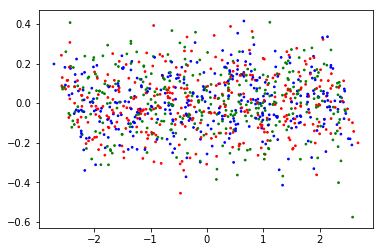

In [14]:
#Plot
plt.scatter(axis1, axis2, color=['red','green','blue'] , s = 3)
plt.show()